In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def pad_image(img, pad_y, pad_x, mode='replicate'):
    h,w = img.shape
    H = h + 2*pad_y
    W = w + 2*pad_x
    out = np.zeros((H,W), dtype=img.dtype)
    out[pad_y:pad_y+h, pad_x:pad_x+w] = img
    if mode == 'replicate':
        out[:pad_y, pad_x:pad_x+w] = img[0:1,:]
        out[pad_y+h:, pad_x:pad_x+w] = img[-1:,:]
        out[:, :pad_x] = out[:, pad_x:pad_x+1]
        out[:, pad_x+w:] = out[:, pad_x+w-1:pad_x+w]
    return out

def convolution(img, kernel):
    kh, kw = kernel.shape
    pad_y = kh//2
    pad_x = kw//2
    padded = pad_image(img, pad_y, pad_x, mode='replicate')
    h,w = img.shape
    out = np.zeros_like(img, dtype=np.float32)
    for y in range(h):
        for x in range(w):
            region = padded[y:y+kh, x:x+kw]
            out[y,x] = np.sum(region * kernel)
    return out


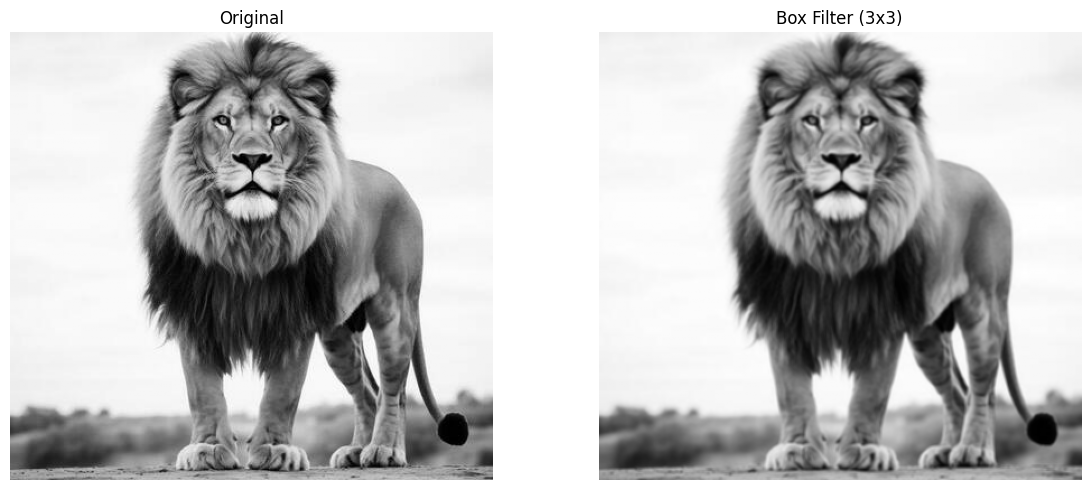

In [26]:
# Box Filter (Mean Filter)
def box_filter(img):
    kernel = np.array([[1,1,1],
                       [1,1,1],
                       [1,1,1]], dtype=np.float32) / 9.0
    return convolution(img, kernel)

box_result = box_filter(img)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(box_result, cmap='gray')
plt.title('Box Filter (3x3)')
plt.axis('off')
plt.tight_layout()
plt.show()

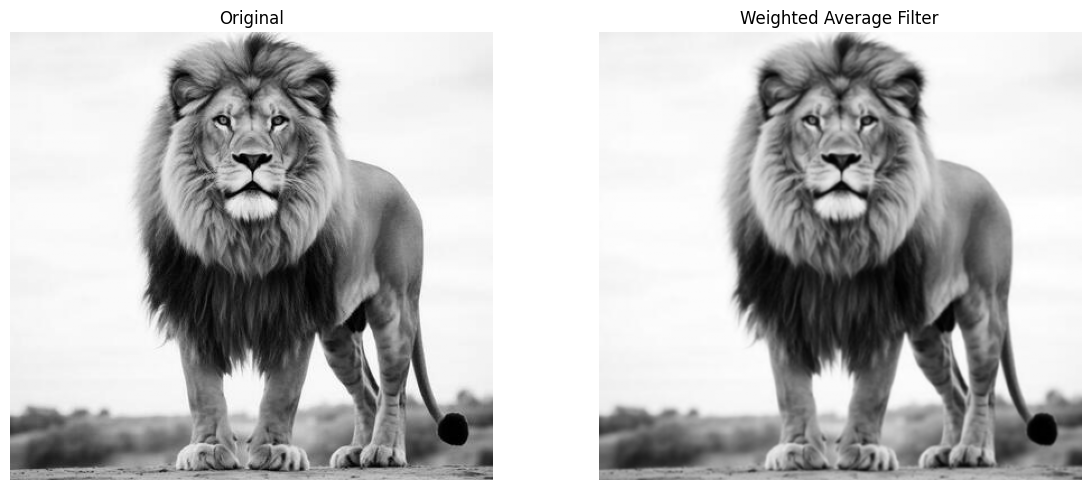

In [27]:
# Weighted Average Filter
def weighted_average_filter(img):
    kernel = np.array([[1,2,1],
                       [2,4,2],
                       [1,2,1]], dtype=np.float32) / 16.0
    return convolution(img, kernel)

weighted_result = weighted_average_filter(img)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(weighted_result, cmap='gray')
plt.title('Weighted Average Filter')
plt.axis('off')
plt.tight_layout()
plt.show()


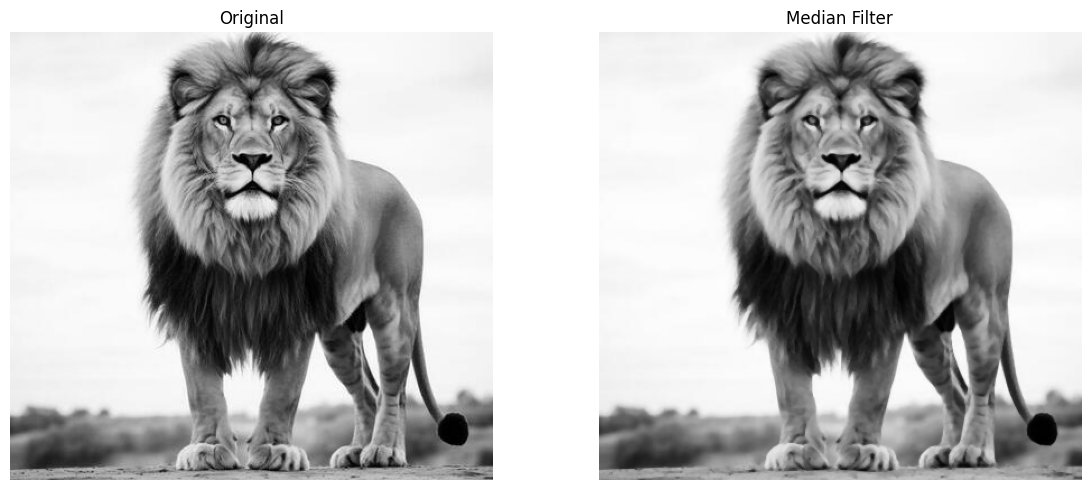

In [28]:
# Median Filter
def median_filter(img):
    padded = pad_image(img, 1, 1, mode='replicate')
    h,w = img.shape
    out = np.zeros_like(img)
    for y in range(h):
        for x in range(w):
            region = padded[y:y+3, x:x+3].flatten()
            region.sort()
            out[y,x] = region[4]  # median of 9 values
    return out

median_result = median_filter(img)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(median_result, cmap='gray')
plt.title('Median Filter')
plt.axis('off')
plt.tight_layout()
plt.show()


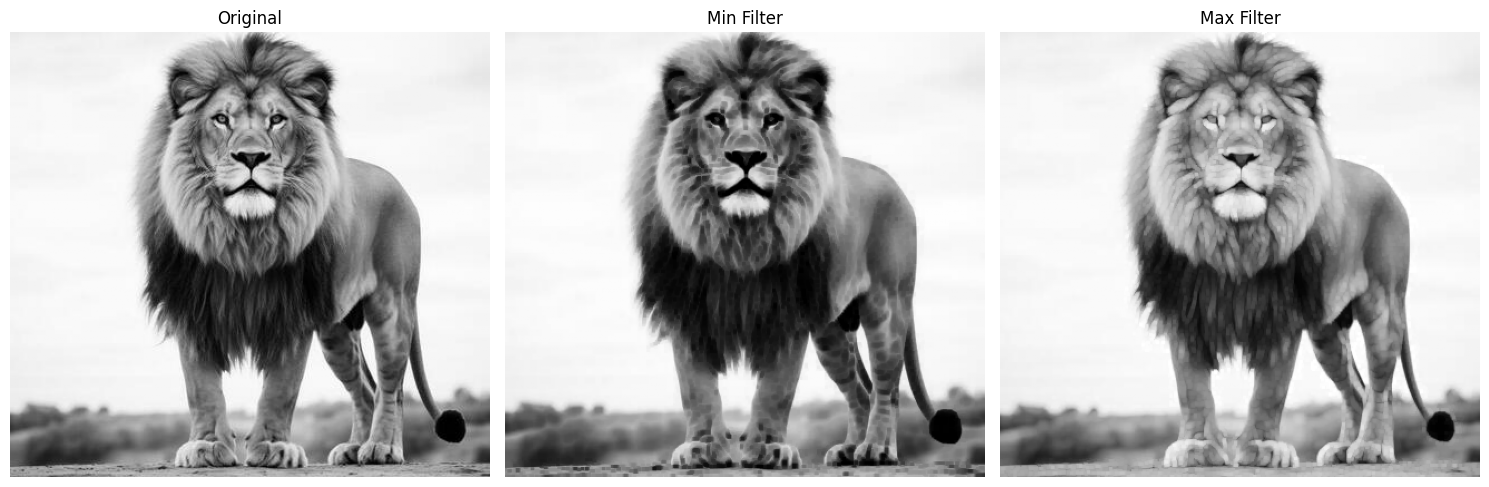

In [29]:
# Min and Max Filters
def min_filter(img):
    padded = pad_image(img, 1, 1, mode='replicate')
    h,w = img.shape
    out = np.zeros_like(img)
    for y in range(h):
        for x in range(w):
            out[y,x] = np.min(padded[y:y+3, x:x+3])
    return out

def max_filter(img):
    padded = pad_image(img, 1, 1, mode='replicate')
    h,w = img.shape
    out = np.zeros_like(img)
    for y in range(h):
        for x in range(w):
            out[y,x] = np.max(padded[y:y+3, x:x+3])
    return out

min_result = min_filter(img)
max_result = max_filter(img)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(min_result, cmap='gray')
plt.title('Min Filter')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(max_result, cmap='gray')
plt.title('Max Filter')
plt.axis('off')
plt.tight_layout()
plt.show()

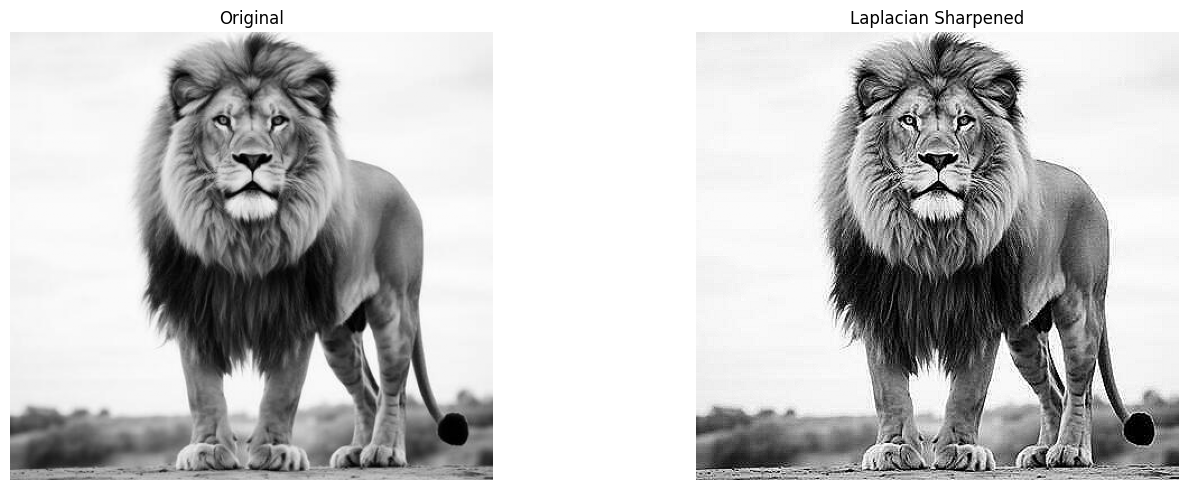

In [ ]:
# Laplacian Filter (neg)
def laplacian_filter(img):
    kernel = np.array([[0,1,0],
                       [1,-4,1],
                       [0,1,0]], dtype=np.float32)
    return convolution(img, kernel)

def laplacian_sharpening(img):
    lap = laplacian_filter(img)
    sharpened = img - lap
    return lap, np.clip(sharpened, 0, 255)

lap_result, sharp_result = laplacian_sharpening(img)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(sharp_result, cmap='gray')
plt.title('Laplacian Sharpened')
plt.axis('off')
plt.tight_layout()
plt.show()

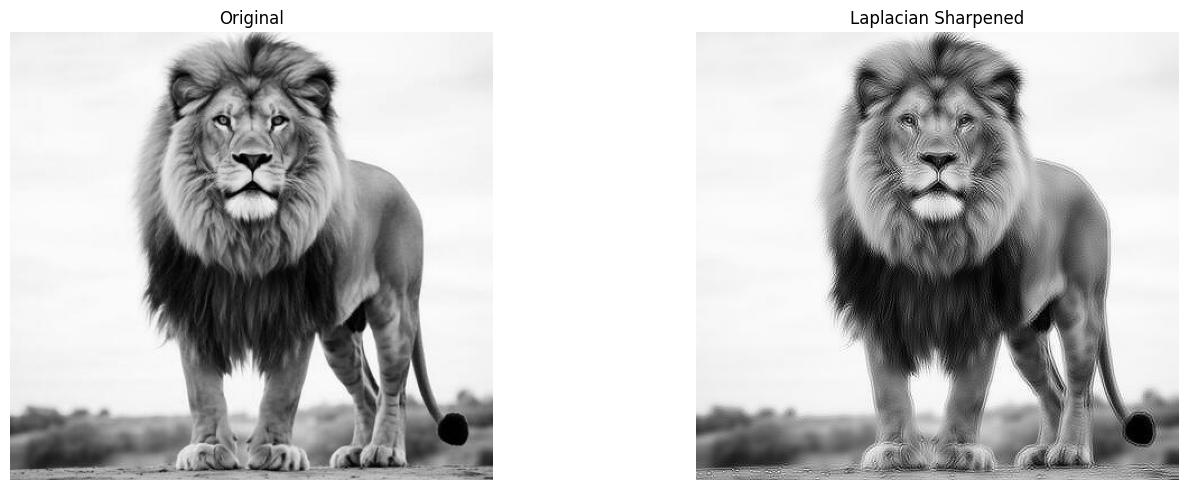

In [ ]:
# Laplacian Filter (pos)
def laplacian_filter(img):
    kernel = np.array([[0,-1,0],
                       [-1,4,-1],
                       [0,-1,0]], dtype=np.float32)
    return convolution(img, kernel)

def laplacian_sharpening(img):
    lap = laplacian_filter(img)
    sharpened = img - lap
    return lap, np.clip(sharpened, 0, 255)

lap_result, sharp_result = laplacian_sharpening(img)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(sharp_result, cmap='gray')
plt.title('Laplacian Sharpened')
plt.axis('off')
plt.tight_layout()
plt.show()

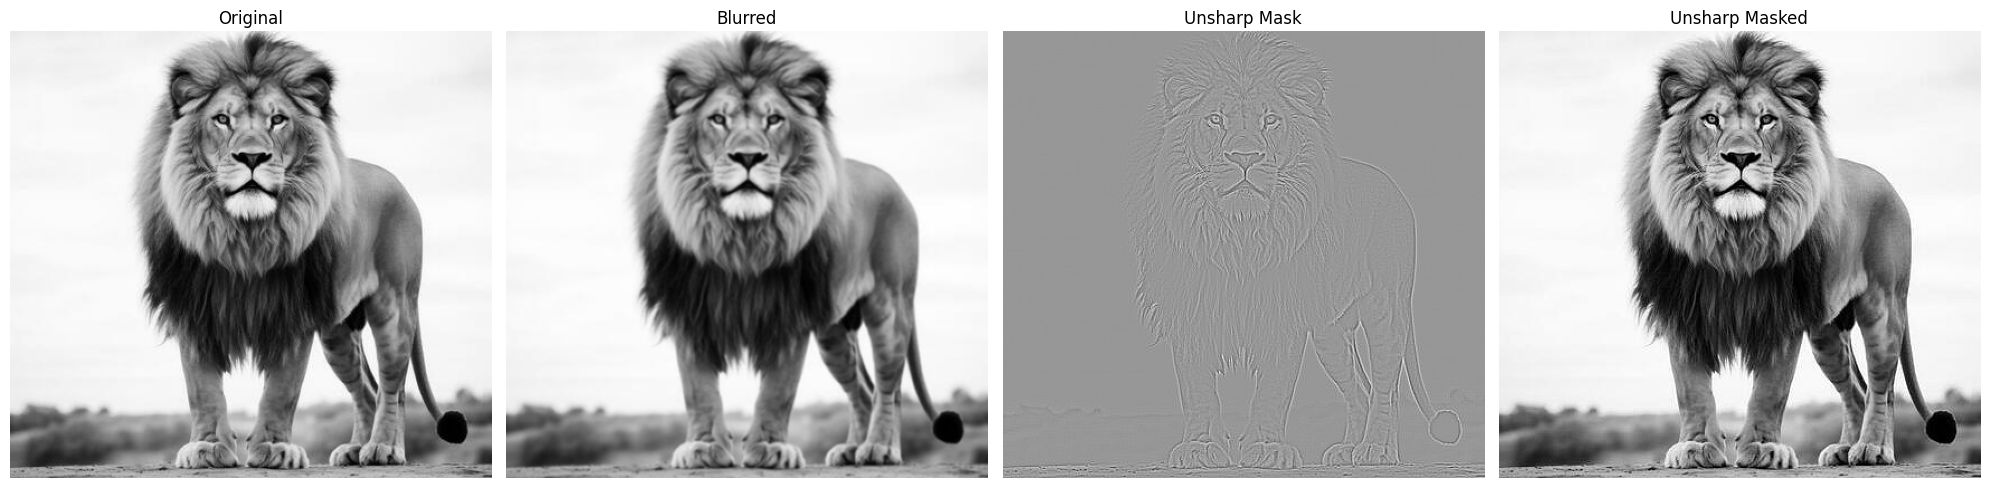

In [32]:
# Unsharp Masking
def unsharp_masking(img, k=1.0):
    # Blur using weighted average
    blurred = weighted_average_filter(img)
    # Create mask
    mask = img - blurred
    # Apply unsharp masking
    sharpened = img + k * mask
    return blurred, mask, np.clip(sharpened, 0, 255)

blurred, mask, unsharp_result = unsharp_masking(img, k=1.0)

plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(blurred, cmap='gray')
plt.title('Blurred')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(mask, cmap='gray')
plt.title('Unsharp Mask')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(unsharp_result, cmap='gray')
plt.title('Unsharp Masked')
plt.axis('off')
plt.tight_layout()
plt.show()

(np.float64(-0.5), np.float64(430.5), np.float64(399.5), np.float64(-0.5))

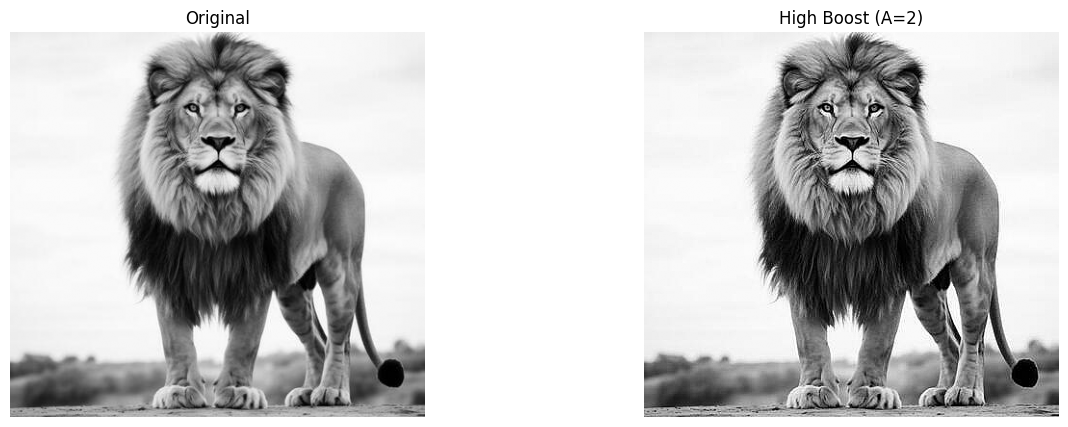

In [38]:
# High Boost Filtering
def high_boost_filter(img, A=2.0):
    blurred = weighted_average_filter(img)
    mask = img - blurred
    result = img + A * mask
    return np.clip(result, 0, 255)

highboost_A2 = high_boost_filter(img, A=2.0)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(highboost_A2, cmap='gray')
plt.title('High Boost (A=2)')
plt.axis('off')


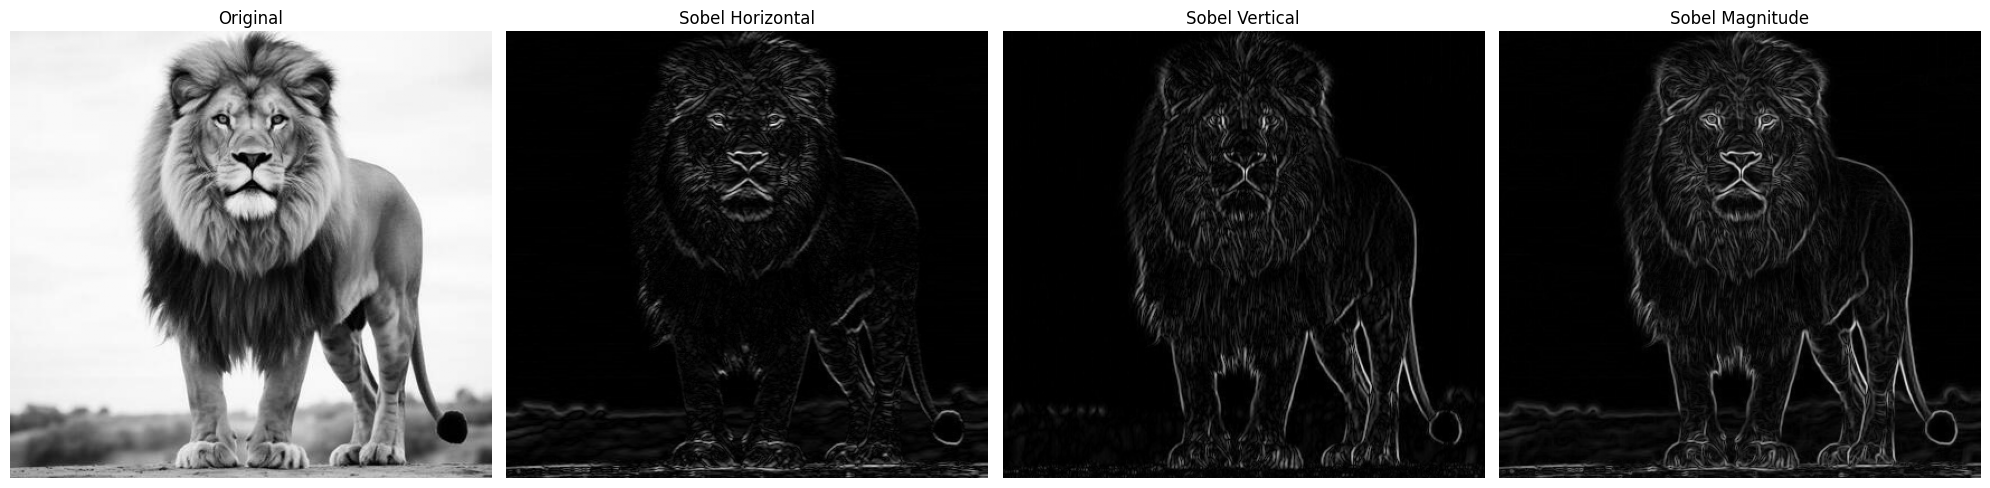

In [34]:
# Sobel Edge Detection
def sobel_filters(img):
    # Sobel kernels
    sobel_h = np.array([[-1,-2,-1],
                        [0,0,0],
                        [1,2,1]], dtype=np.float32)
    
    sobel_v = np.array([[-1,0,1],
                        [-2,0,2],
                        [-1,0,1]], dtype=np.float32)
    
    Gh = convolution(img, sobel_h)
    Gv = convolution(img, sobel_v)
    Gmag = np.sqrt(Gh**2 + Gv**2)
    
    return Gh, Gv, Gmag

sobel_h, sobel_v, sobel_mag = sobel_filters(img)

plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(np.abs(sobel_h), cmap='gray')
plt.title('Sobel Horizontal')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(np.abs(sobel_v), cmap='gray')
plt.title('Sobel Vertical')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(sobel_mag, cmap='gray')
plt.title('Sobel Magnitude')
plt.axis('off')
plt.tight_layout()
plt.show()